In [255]:

# for loading/processing the images  
from keras_preprocessing.image import load_img 
from tensorflow.keras.utils import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [256]:
!unzip -q "data.zip"

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [257]:
path = r"D:\Projects\ColorPallete\data"
os.chdir(path)

# this list holds all the image filename
images = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the img list
            images.append(file.name)

images

['16.png',
 '1643127674_57-animeshka-org-p-peacocks-eye-zhivotnie-foto-65.png',
 '1664245940_48-animeshka-org-p-medieval-city-art-vkontakte-53.png',
 '261099.png',
 '27519050f89caed71099bf6589bba38c.png',
 '5164ea719d79e4aac3d21f4a1aa2abfe.png',
 '568127-city-sky-sunset.png',
 '734b7c93407fdfc2389b6961cbcfda0a.png',
 'alberta-2297204_1920.png',
 'b85620657c466e10213f48118c02b640.png',
 'beach.png',
 'birb.png',
 'canyon-1740973_1920.png',
 'chinesenewyear.png',
 'cryncat.png',
 'Culture_blackhole_1178748615.png',
 'cyberbug.png',
 'da538bac62ee5e233cd82bb75b0d3c47ba0cdc03.png',
 'hand-painted-watercolor-pastel-sky-background_23-2148901163.png',
 'hd-wallpaper-3021072_1920.png',
 'illust_96765396_20220328_055411.png',
 'kumi.png',
 'landscape-1146911_1920.png',
 'landscape-1328858_1920.png',
 'Logo Resmi 20 Tahun PCR RGB Medium.png',
 'Logo-ITSA.png',
 'logo_pcr (1).png',
 'lunar-landscape-2308000_1920.png',
 'ml_sky_city_china_02_x.png',
 'mountains-1112911_1920.png',
 'mountains-13901

**Data Pre-Processing**

In [258]:
# load the image as a 224x224 array
img = load_img(images[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


**Model Untuk Feature Extraction Gambar**

In [259]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

**Feature Extraction**

In [260]:
data = {}
p = r"D:\Projects\ColorPallete"

# loop through each image in the dataset
for image in images:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(image,model)
        data[image] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          
 
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

1/1 [==============================] - 0s 120ms/step


(43, 4096)

In [261]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=43, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

**Evaluasi**

d:\Projects\ColorPallete\_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Projects\ColorPallete\_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Projects\ColorPallete\_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Projects\ColorPallete\_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Projects\ColorPallete\_env\lib\si

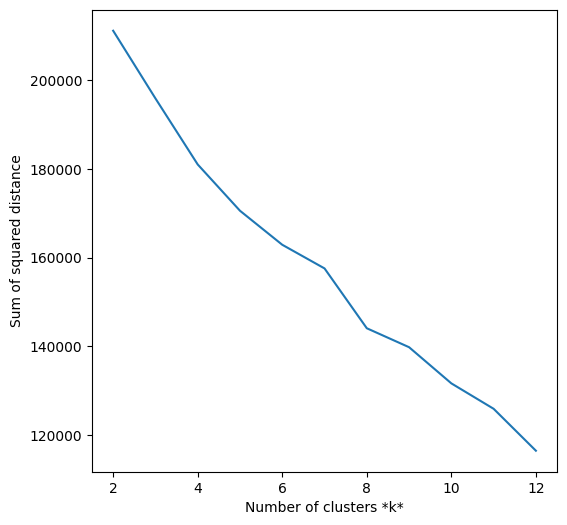

In [262]:
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(2, 13))

for k in list_k:
    km = KMeans(n_clusters=k).fit(x)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [263]:
# cluster feature vectors
kmeans = KMeans(n_clusters=7, random_state=22)
kmeans.fit(x)
kmeans.inertia_
kmeans.labels_

d:\Projects\ColorPallete\_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 6, 0, 3, 3, 0, 0, 3, 2, 1, 2, 3, 2, 3, 3, 3, 0, 1, 3, 3, 3, 1,
       2, 0, 1, 3, 3, 0, 0, 2, 2, 2, 3, 0, 3, 3, 3, 4, 3, 3, 2, 3, 0])

**Prediksi**

In [264]:
os.chdir("D:\Projects\ColorPallete")

path = r"D:\Projects\ColorPallete\predict"
os.chdir(path)

# this list holds all the image filename
predict_img = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the img list
            predict_img.append(file.name)

predict_img

['predict (10).png',
 'predict (11).png',
 'predict (12).png',
 'predict (13).png',
 'predict (14).png',
 'predict (15).png',
 'predict (16).png',
 'predict (17).png',
 'predict (18).png',
 'predict (19).png',
 'predict (2).png',
 'predict (20).png',
 'predict (21).png',
 'predict (22).png',
 'predict (23).png',
 'predict (24).png',
 'predict (25).png',
 'predict (26).png',
 'predict (27).png',
 'predict (28).png',
 'predict (29).png',
 'predict (3).png',
 'predict (30).png',
 'predict (31).png',
 'predict (32).png',
 'predict (33).png',
 'predict (34).png',
 'predict (35).png',
 'predict (36).png',
 'predict (37).png',
 'predict (38).png',
 'predict (39).png',
 'predict (4).png',
 'predict (40).png',
 'predict (41).png',
 'predict (42).png',
 'predict (43).png',
 'predict (44).png',
 'predict (5).png',
 'predict (6).png',
 'predict (7).png',
 'predict (8).png',
 'predict (9).png',
 'predict.png']

In [265]:
predict_data = {}
p = r"D:\Projects\ColorPallete"

# loop through each image in the dataset
for image in predict_img:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(image,model)
        predict_data[image] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(predict_data,file)
          
 
# get a list of the filenames
filenames = np.array(list(predict_data.keys()))

# get a list of just the features
predictFeat = np.array(list(predict_data.values()))
predictFeat.shape

# reshape so that there are 210 samples of 4096 vectors
predictFeat = predictFeat.reshape(-1,4096)
predictFeat.shape

1/1 [==============================] - 0s 122ms/step


(44, 4096)

In [266]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=43, random_state=22)
pca.fit(predictFeat)
pred = pca.transform(predictFeat)

In [267]:
kmeans.predict(pred)

array([1, 3, 3, 3, 3, 0, 0, 4, 0, 2, 0, 0, 3, 3, 2, 3, 0, 3, 0, 1, 3, 0,
       3, 3, 0, 0, 3, 2, 0, 2, 0, 0, 0, 2, 3, 2, 3, 3, 0, 3, 3, 3, 1, 5])

In [268]:
os.chdir("D:\Projects\ColorPallete")
pickle.dump(kmeans, open("k-Means.pkl", 'wb'))

In [269]:
# # load the model from disk
# loaded_model = pickle.load(open("k-Means.pkl", 'rb'))

# #Feature Extraction dulu, baru PCA then predict

# result = loaded_model.predict(pred)
# print(result)

**Abaikan yg di bawah ppk SNJ**

In [270]:
# from yellowbrick.cluster import SilhouetteVisualizer
# from sklearn.metrics import  silhouette_score

# fig, ax = plt.subplots(6, 2, figsize=(15,15))
# for i in list_k:
#     '''
#     Create KMeans instance for different number of clusters
#     '''
#     km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(i, 2)
    
#     km.fit(x)
#     score = silhouette_score(x, km.labels_, metric='euclidean')
#     # print('Silhouette Score \i: %.3f' % score)
#     print('Silhouette Score n=', i, 'is', score)
#     '''
#     Create SilhouetteVisualizer instance with KMeans instance
#     Fit the visualizer
#     '''
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(x)